# Cifar 이용

In [2]:
import os
from glob import glob

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

import tensorflow as tf 

%matplotlib inline

In [5]:
os.listdir('dataset/cifar/train/*.png')

['labels.txt', 'test', 'train']

In [6]:
train_paths = glob('dataset/cifar/train/*.png')
test_paths = glob('dataset/cifar/test/*.png')

In [7]:
len(train_paths), len(test_paths)

(50000, 10000)

In [11]:
path = train_paths[0]

'dataset/cifar/train\\0_frog.png'

In [13]:
os.path.dirname(path)

'dataset/cifar/train'

In [12]:
os.path.basename(path)

'0_frog.png'

In [14]:
os.path.exists('rudfh') # 경로 존재하는지 확인 

False

## class 이름 얻은 것을 함수로 묶기

In [20]:
def get_class_name(path):
    fname = os.path.basename(path)
    cls_name = fname.replace('.png', '').split('_')[-1]
    return cls_name

In [22]:
cls_name = get_class_name(path)

## Class 수 확인

In [25]:
class_names = []

for path in train_paths:
    cls_name = get_class_name(path)
    class_names.append(cls_name)

In [32]:
class_names = [get_class_name(path) for path in train_paths] # 한줄짜리 

In [50]:
test_class_names = [get_class_name(path) for path in test_paths] # 한줄짜리 

In [33]:
len(class_names)

50000

In [37]:
uniques = np.unique(class_names, return_counts=True) # 중복안되게, 있는 애들만, 클래스마다 얼만큼있는지 확인도 가능

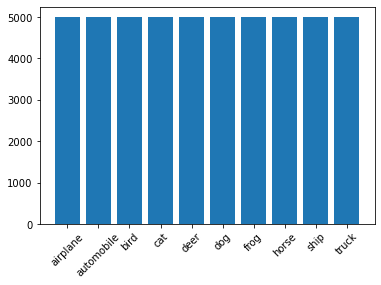

In [39]:
plt.bar(uniques[0], uniques[1])
# == plt.bar(*uniques)
plt.xticks(rotation=45)
plt.show()

# Data Frame 생성
> csv 만들기

In [41]:
data_ex = {'a' : [1, 2, 3], 'b' : [10, 20, 30], 'c' : [100, 200, 300]}

In [42]:
df_ex = pd.DataFrame(data_ex)
df_ex

,a,b,c
0,1,10,100
1,2,20,200
2,3,30,300


In [53]:
train_paths[0], class_names[0]

data = {'name' : train_paths, 'class' : class_names}
train_df = pd.DataFrame(data)

In [54]:
train_df.head() # 앞에 다섯개만 보여줌

,name,class
0,dataset/cifar/train\0_frog.png,frog
1,dataset/cifar/train\10000_automobile.png,automobile
2,dataset/cifar/train\10001_frog.png,frog
3,dataset/cifar/train\10002_frog.png,frog
4,dataset/cifar/train\10003_ship.png,ship


In [55]:
data = {'name' : test_paths, 'class' : test_class_names}
test_df = pd.DataFrame(data)

In [57]:
test_df.head()

,name,class
0,dataset/cifar/test\0_cat.png,cat
1,dataset/cifar/test\1000_dog.png,dog
2,dataset/cifar/test\1001_airplane.png,airplane
3,dataset/cifar/test\1002_ship.png,ship
4,dataset/cifar/test\1003_deer.png,deer


## DataFrame 저장

In [59]:
train_csv_path = 'train_dataset.csv'
test_csv_path = 'test_dataset.csv'

In [61]:
train_df.to_csv(train_csv_path, index=False) # index지우기
test_df.to_csv(test_csv_path, index=False)

## Data 확인

In [63]:
from PIL import Image
from tqdm import tqdm_notebook

In [64]:
heights = []
widths = []

In [ ]:
for path in tqdm_notebook(train_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w = image.shape